 **Made By :-  Ashu Kumar**

# <center>Predict Graduate Admissions</center>

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline
sns.set(color_codes=True)

**Load the dataset into jupyter notebook**

In [2]:
df = pd.read_csv('admission.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [4]:
df.shape

(500, 9)

**Conduct an examination of the columns present in the dataset.**

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Conduct an examination of the distinct values present in each column of the dataset.**

In [8]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Conducting an assessment to identify and examine duplicate values within the dataset.**

In [10]:
df.duplicated().sum()

0

**Assessing whether students are engaged in research activities**

In [11]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

A total of 280 students were actively involved in research, while 220 students did not participate in research activities.

## Data Visualization

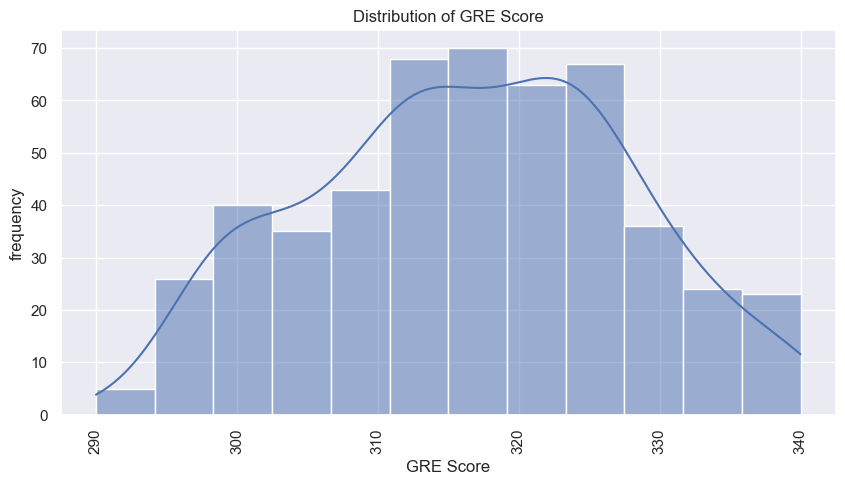

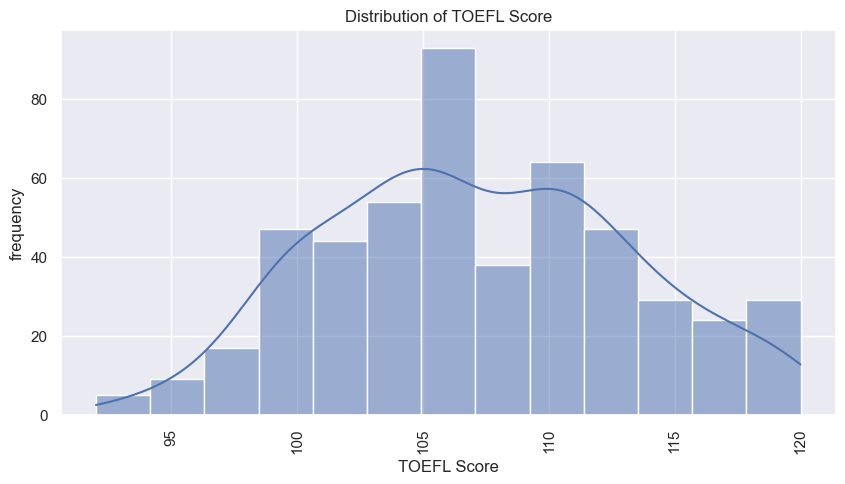

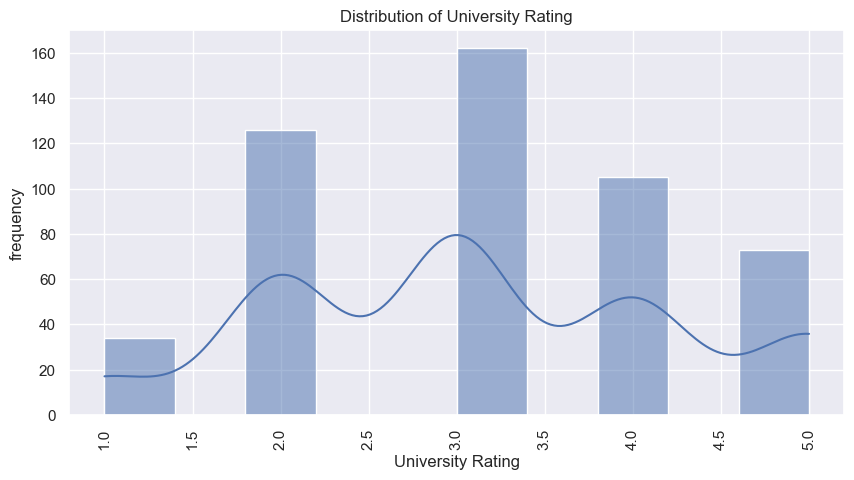

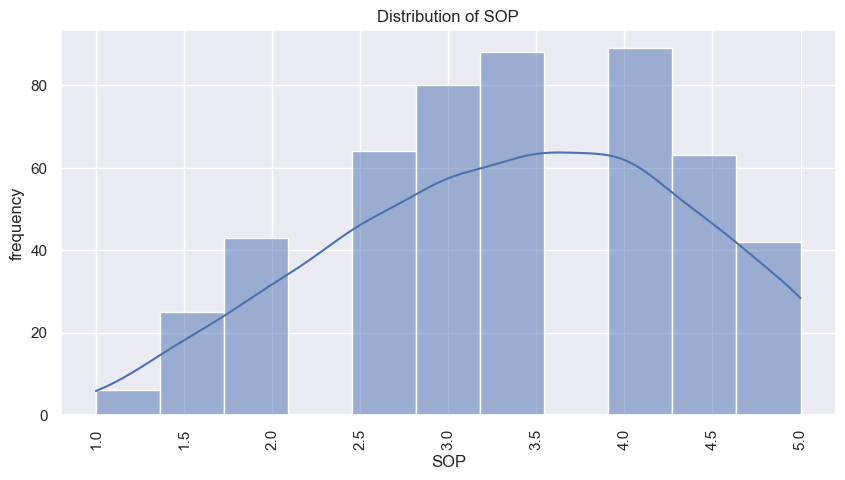

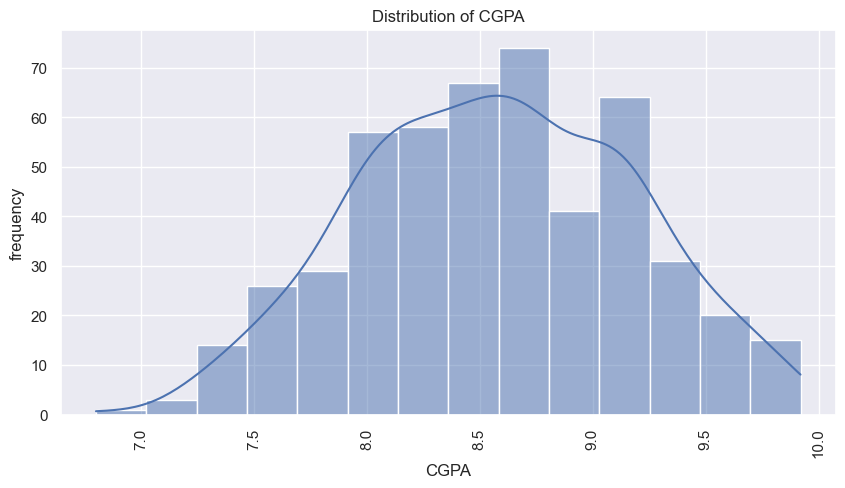

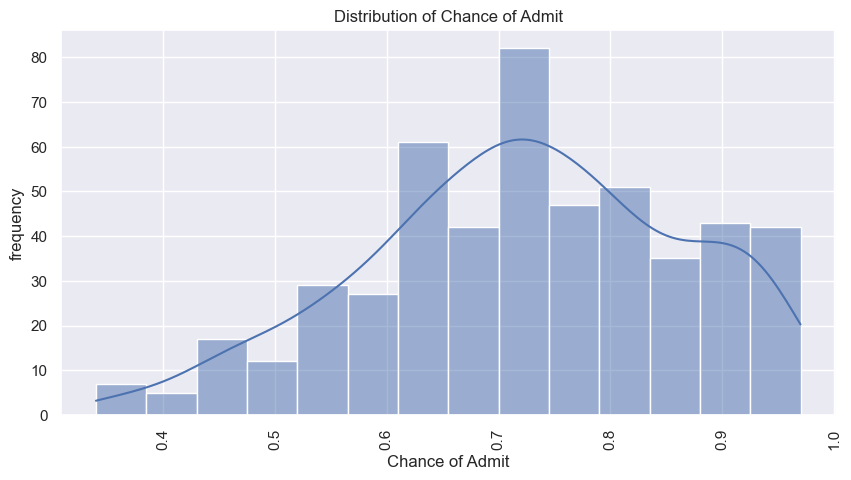

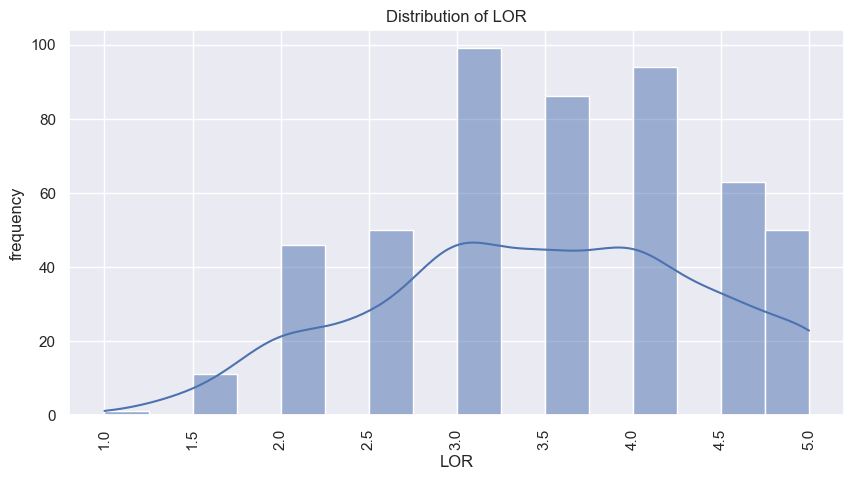

In [12]:
numeric_variables = ['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Chance of Admit','LOR']
for var in numeric_variables:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.xticks(rotation=90)
    plt.xlabel(var)
    plt.ylabel('frequency')
    plt.show()

In the preceding visualizations, we observe the distribution patterns across multiple columns.

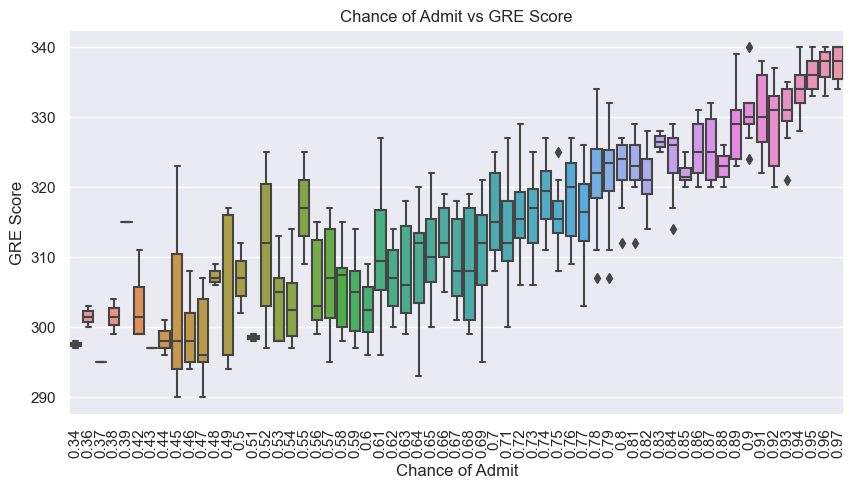

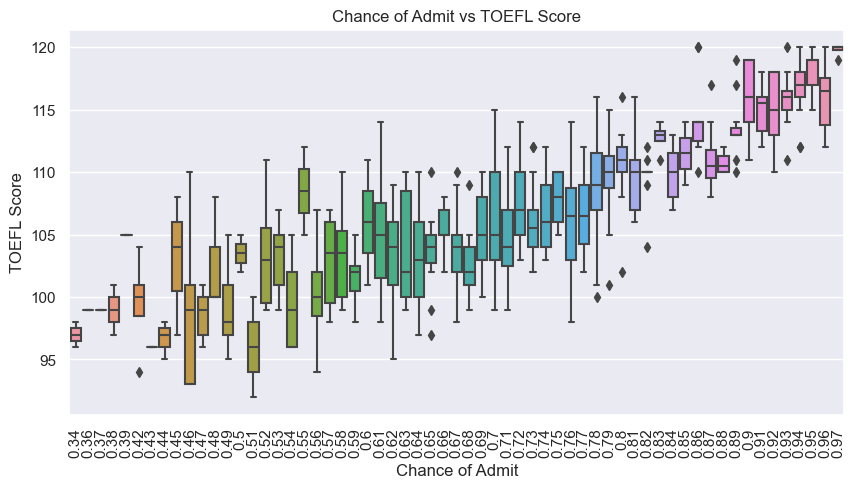

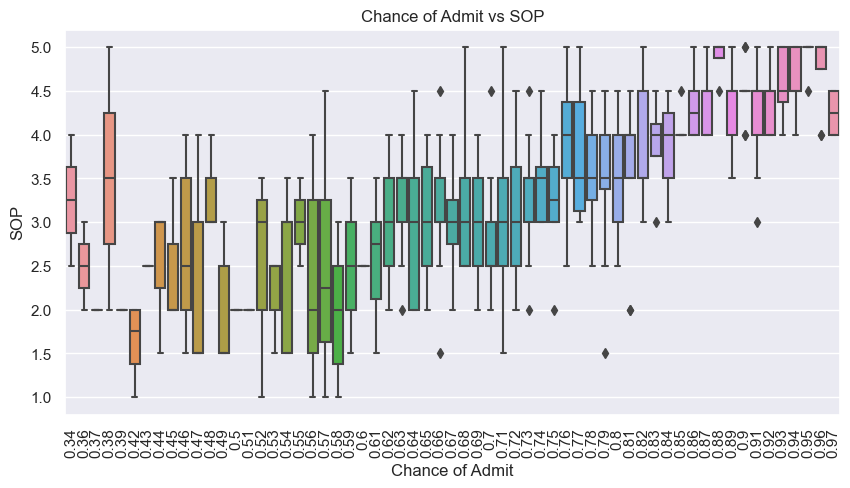

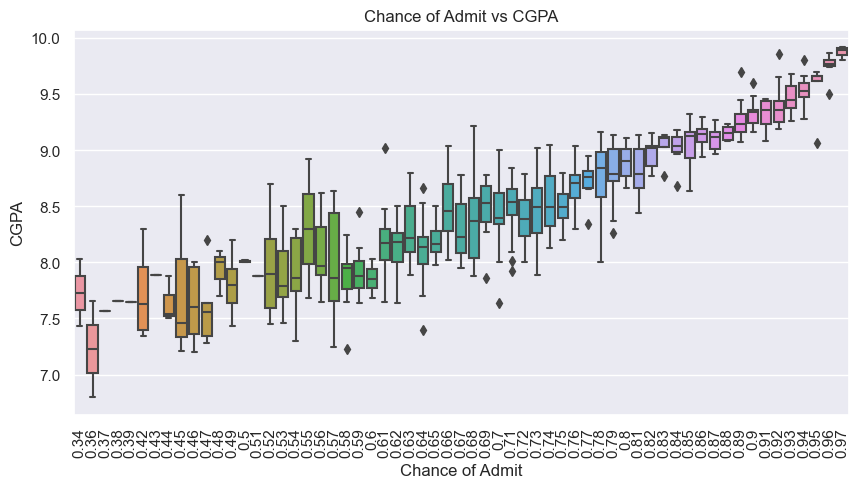

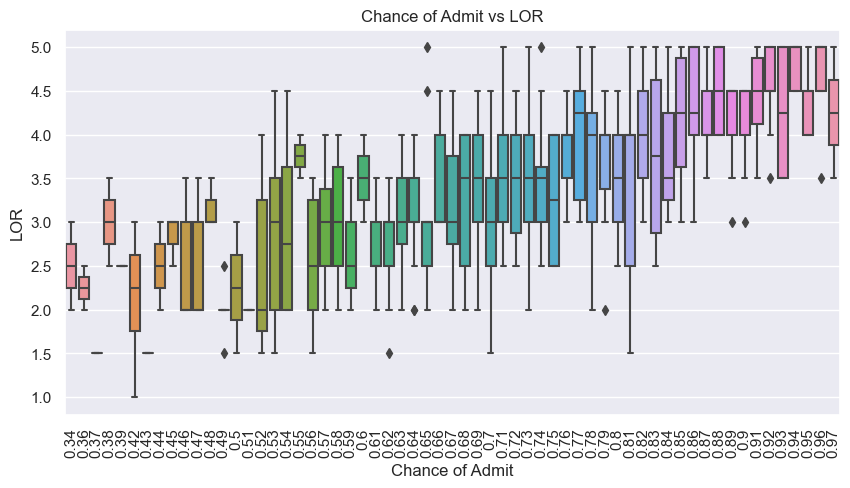

In [13]:
box_numeric_variables = ['GRE Score','TOEFL Score','SOP','CGPA','LOR']
for var in box_numeric_variables:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Chance of Admit', y=var, data=df)
    plt.title(f"Chance of Admit vs {var}")
    plt.xticks(rotation=90)
    plt.xlabel('Chance of Admit')
    plt.ylabel(var)
    plt.show()

In the preceding visualization, it is evident that as 'GRE Score,' 'TOEFL Score,' 'SOP,' 'LOR,' and 'CGPA' scores increase, there is a corresponding rise in the likelihood of securing admissions.

**Assigning the features as X and trarget as y and then split the dataset for further modelling**

In [14]:
def categorize_Chance(score):
    if score >= 0.82:
        return "1"
    else:
        return "0"

# Create the new categorical variable
df['Chance_category'] = df['Chance of Admit'].apply(categorize_Chance)


In [15]:
X = df.drop(["Chance of Admit","Chance_category","Serial No."], axis=1)
y = df["Chance_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a list of diverse machine learning algorithms, which will serve as the classifiers for our analysis.**

In [16]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

**Create a dictionary that contains various evaluation metrics as keys and their corresponding values as the evaluation formulas.**

In [17]:
metrics = {
    'R2 Score': [],
    'Mean Absolute Error': [],
    'Mean Squared Error': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

**Create a pipeline by combining the StandardScaler and the chosen classifier, train it on the training data, predict the rocket launches for the test data, calculate the evaluation metrics, store them in the dictionary, and display the evaluation metrics for the current classifier.**

In [18]:
for name, classifier in classifiers:
    # Create a pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict the rocket launches for the test data
    y_pred = pipeline.predict(X_test)

    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionary
    metrics['R2 Score'].append(r2)
    metrics['Mean Absolute Error'].append(mae)
    metrics['Mean Squared Error'].append(mse)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

    # Display the evaluation metrics for the current classifier
    print(f"Metrics for {name}:")
    print("R2 Score:", r2)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

Metrics for Decision Tree:
R2 Score: 0.5941146626078133
Mean Absolute Error: 0.08
Mean Squared Error: 0.08
Accuracy: 0.92
Precision: 0.88
Recall: 0.8148148148148148
F1 Score: 0.8461538461538461

Metrics for Support Vector Machine:
R2 Score: 0.7970573313039067
Mean Absolute Error: 0.04
Mean Squared Error: 0.04
Accuracy: 0.96
Precision: 0.96
Recall: 0.8888888888888888
F1 Score: 0.923076923076923

Metrics for Random Forest:
R2 Score: 0.7463216641298833
Mean Absolute Error: 0.05
Mean Squared Error: 0.05
Accuracy: 0.95
Precision: 0.9230769230769231
Recall: 0.8888888888888888
F1 Score: 0.9056603773584906

Metrics for Gaussian Naive Bayes:
R2 Score: 0.7463216641298833
Mean Absolute Error: 0.05
Mean Squared Error: 0.05
Accuracy: 0.95
Precision: 0.84375
Recall: 1.0
F1 Score: 0.9152542372881356

Metrics for Gradient Boosting Classifier:
R2 Score: 0.69558599695586
Mean Absolute Error: 0.06
Mean Squared Error: 0.06
Accuracy: 0.94
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0

In [19]:
metrics_df = pd.DataFrame(metrics, index=[name for name, _ in classifiers])

# Find the best algorithm based on the highest accuracy
sorted_metrics_df = metrics_df.sort_values(by=['Accuracy', 'Precision','R2 Score','Recall','F1 Score'], ascending=False)

# Find the best algorithm based on both accuracy and precision
best_algorithm = sorted_metrics_df.index[0]

# Print the evaluation metrics for each algorithm
print(sorted_metrics_df)

# Print the best algorithm
print('Best Algorithm:', best_algorithm)

                              R2 Score  Mean Absolute Error  \
Support Vector Machine        0.797057                 0.04   
K-Nearest Neighbors           0.797057                 0.04   
Logistic Regression           0.797057                 0.04   
Random Forest                 0.746322                 0.05   
Gaussian Naive Bayes          0.746322                 0.05   
Gradient Boosting Classifier  0.695586                 0.06   
Decision Tree                 0.594115                 0.08   

                              Mean Squared Error  Accuracy  Precision  \
Support Vector Machine                      0.04      0.96   0.960000   
K-Nearest Neighbors                         0.04      0.96   0.960000   
Logistic Regression                         0.04      0.96   0.925926   
Random Forest                               0.05      0.95   0.923077   
Gaussian Naive Bayes                        0.05      0.95   0.843750   
Gradient Boosting Classifier                0.06      0.9



Based on the above results, it is evident that K-Nearest Neighbors outperforms the other algorithms for this particular dataset. The evaluation metrics for K-Nearest Neighbors are as follows:

    R2 Score: 0.797057              
    Mean Absolute Error: 0.04
    Mean Squared Error:  0.04
    Accuracy: 0.96
    Precision: 0.96000
    Recall: 0.888889
    F1 Score: 0.923077

## MODEL EVALUATION

**Now, let's create two lists: "accuracy_before" and "accuracy_after" to calculate the accuracy before cross-validation and the accuracy after cross-validation, respectively.**

In [20]:
accuracy_before = []
accuracy_after = []

In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_before.append(accuracy)
print('Accuracy Before CV:', accuracy)

Accuracy Before CV: 0.96


**Let's calculate the accuracy after cross-validation, cross-validation scores, and the average cross-validation score.**

In [22]:
scores = cross_val_score(pipeline, X, y, cv=5)
accuracy_cv = np.mean(scores)
accuracy_after.append(accuracy_cv)
print('Accuracy After CV:', accuracy_cv)
print('Cross-Validation Scores:', scores)
print('Average Cross-Validation Score:', np.mean(scores))

Accuracy After CV: 0.924
Cross-Validation Scores: [0.96 0.89 0.92 0.91 0.94]
Average Cross-Validation Score: 0.924


**Now let's create a confusion plot to visualize the test and prediction results.**

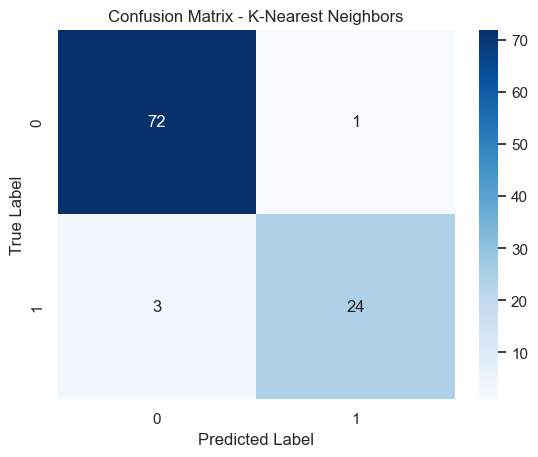

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.title('Confusion Matrix - ' + name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()